## Data pre-processing

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Gagan df load
df = pd.read_csv(r'C:\Users\Gagan\Desktop\AI - ML Hackathon\Info files\Data Science for Health_ Mining Protein Data to Help Scientists Fight Disease\Data Science for Health_ Mining Protein Data to Help Scientists Fight Disease\data_for_activity\df_train.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_h = pd.read_csv('df_holdout.csv')

In [4]:
df.head()

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_local_ScalesGap_scl2.1.lag3,feat_local_ScalesGap_scl3.1.lag3,feat_local_ScalesGap_scl4.1.lag3,feat_local_ScalesGap_scl5.1.lag3,feat_local_ScalesGap_scl3.2.lag3,feat_local_ScalesGap_scl4.2.lag3,feat_local_ScalesGap_scl5.2.lag3,feat_local_ScalesGap_scl4.3.lag3,feat_local_ScalesGap_scl5.3.lag3,feat_local_ScalesGap_scl5.4.lag3
0,P23253.1:2,5693,P23253.1,24,Y,1378212,75914,"9606,9986",0,2,...,-6.534201,-23.461905,-2.026497,-10.976587,10.632502,1.899121,5.987014,22.757457,-6.143911,-1.136779
1,P23253.1:2,5693,P23253.1,25,S,1378212,75914,"9606,9986",0,2,...,-4.392078,-1.733373,7.224207,-2.539621,8.304244,-0.358899,5.584130,17.243431,-6.938871,-8.858502
2,P23253.1:2,5693,P23253.1,26,V,1378212,75914,"9606,9986",0,2,...,-7.734902,1.585801,-2.086515,3.191944,1.550936,5.611089,2.161179,9.840781,-2.644685,-10.233049
3,P23253.1:2,5693,P23253.1,27,D,1378212,75914,"9606,9986",0,2,...,-9.555528,0.306586,-2.501868,2.321484,2.366742,5.858835,2.451758,10.419416,-1.646064,-10.823489
4,P23253.1:2,5693,P23253.1,28,D,1378212,75914,"9606,9986",0,2,...,-7.413021,5.494316,5.306029,4.775133,-2.842552,-1.012134,-0.069497,19.691379,1.410738,-11.099221


In [5]:
df.isnull().sum()

Info_PepID                          0
Info_organism_id                    0
Info_protein_id                     0
Info_pos                            0
Info_AA                             0
                                   ..
feat_local_ScalesGap_scl4.2.lag3    0
feat_local_ScalesGap_scl5.2.lag3    0
feat_local_ScalesGap_scl4.3.lag3    0
feat_local_ScalesGap_scl5.3.lag3    0
feat_local_ScalesGap_scl5.4.lag3    0
Length: 399, dtype: int64

In [6]:
df.describe()

,Info_organism_id,Info_pos,Info_cluster,Class,feat_local_Entropy,feat_local_MolWeight,feat_local_AAtypes_Tiny,feat_local_AAtypes_Small,feat_local_AAtypes_Aliphatic,feat_local_AAtypes_Aromatic,...,feat_local_ScalesGap_scl2.1.lag3,feat_local_ScalesGap_scl3.1.lag3,feat_local_ScalesGap_scl4.1.lag3,feat_local_ScalesGap_scl5.1.lag3,feat_local_ScalesGap_scl3.2.lag3,feat_local_ScalesGap_scl4.2.lag3,feat_local_ScalesGap_scl5.2.lag3,feat_local_ScalesGap_scl4.3.lag3,feat_local_ScalesGap_scl5.3.lag3,feat_local_ScalesGap_scl5.4.lag3
count,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,...,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000,76740.000000
mean,346116.867084,545.784715,175.684376,-0.973130,2.953601,1896.737032,0.342893,0.557354,0.275763,0.069533,...,-8.438084,-1.540746,-4.288294,0.968322,1.127795,8.950356,-1.453533,1.530130,-0.057158,-0.886325
std,48941.789811,836.893119,94.635068,0.230258,0.391798,149.454915,0.162169,0.182368,0.148376,0.078651,...,20.054159,30.156254,25.061602,18.364664,15.248499,11.184587,8.310524,18.535751,14.279494,11.287688
min,5693.000000,1.000000,2.000000,-1.000000,0.000000,1311.270000,0.000000,0.000000,0.000000,0.000000,...,-105.903658,-193.920932,-84.872057,-87.823388,-94.800433,-34.865104,-70.236744,-120.003942,-243.218326,-109.682091
25%,353153.000000,126.000000,98.000000,-1.000000,2.789898,1796.870000,0.200000,0.400000,0.200000,0.000000,...,-21.329458,-20.567948,-21.502671,-9.602128,-6.622231,1.515004,-5.750715,-10.162376,-6.302618,-6.892354
50%,353153.000000,260.000000,190.000000,-1.000000,3.006239,1900.750000,0.333333,0.533333,0.266667,0.066667,...,-7.722409,-0.859877,-6.298847,0.976243,2.453034,8.009743,-0.631882,1.593168,0.665367,-0.178696
75%,353153.000000,496.000000,243.000000,-1.000000,3.189898,2002.170000,0.466667,0.666667,0.333333,0.133333,...,5.172851,18.494361,10.471799,11.430729,10.820891,15.423876,3.833784,13.192897,7.629141,5.953314
max,353153.000000,4848.000000,342.000000,1.000000,3.906891,2460.840000,1.000000,1.000000,1.000000,0.600000,...,62.639720,120.283114,140.355695,211.689966,64.341145,67.602610,33.056518,95.807390,83.462919,130.999939


In [7]:
df_train = df[df['Info_split'] == 'CV1']
df_test = df[df['Info_split'] == 'CV2']

In [8]:
df_train = df_train.groupby('Info_PepID').quantile([0,0.025,0.05,0.075,0.1,0.0125,0.15,0.0175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5,0.525,0.55,0.575,0.6,0.625,0.65,0.675,0.70,0.725,0.75,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975,1])
df_train = df_train.reset_index()

In [9]:
df_test = df_test.groupby('Info_PepID').quantile([0,0.025,0.05,0.075,0.1,0.0125,0.15,0.0175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5,0.525,0.55,0.575,0.6,0.625,0.65,0.675,0.70,0.725,0.75,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975,1])
df_test = df_test.reset_index()

In [10]:
# df = df.groupby('Info_PepID').quantile([0,0.025,0.05,0.075,0.1,0.0125,0.15,0.0175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5,0.525,0.55,0.575,0.6,0.625,0.65,0.675,0.70,0.725,0.75,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975,1])
# df = df.reset_index()

In [11]:
df.head()

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_local_ScalesGap_scl2.1.lag3,feat_local_ScalesGap_scl3.1.lag3,feat_local_ScalesGap_scl4.1.lag3,feat_local_ScalesGap_scl5.1.lag3,feat_local_ScalesGap_scl3.2.lag3,feat_local_ScalesGap_scl4.2.lag3,feat_local_ScalesGap_scl5.2.lag3,feat_local_ScalesGap_scl4.3.lag3,feat_local_ScalesGap_scl5.3.lag3,feat_local_ScalesGap_scl5.4.lag3
0,P23253.1:2,5693,P23253.1,24,Y,1378212,75914,"9606,9986",0,2,...,-6.534201,-23.461905,-2.026497,-10.976587,10.632502,1.899121,5.987014,22.757457,-6.143911,-1.136779
1,P23253.1:2,5693,P23253.1,25,S,1378212,75914,"9606,9986",0,2,...,-4.392078,-1.733373,7.224207,-2.539621,8.304244,-0.358899,5.584130,17.243431,-6.938871,-8.858502
2,P23253.1:2,5693,P23253.1,26,V,1378212,75914,"9606,9986",0,2,...,-7.734902,1.585801,-2.086515,3.191944,1.550936,5.611089,2.161179,9.840781,-2.644685,-10.233049
3,P23253.1:2,5693,P23253.1,27,D,1378212,75914,"9606,9986",0,2,...,-9.555528,0.306586,-2.501868,2.321484,2.366742,5.858835,2.451758,10.419416,-1.646064,-10.823489
4,P23253.1:2,5693,P23253.1,28,D,1378212,75914,"9606,9986",0,2,...,-7.413021,5.494316,5.306029,4.775133,-2.842552,-1.012134,-0.069497,19.691379,1.410738,-11.099221


In [12]:
# df_h = df_h.groupby('Info_PepID').quantile([0,0.025,0.05,0.075,0.1,0.0125,0.15,0.0175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5,0.525,0.55,0.575,0.6,0.625,0.65,0.675,0.70,0.725,0.75,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975,1])
# df_h = df_h.reset_index()

In [13]:
# from sklearn.model_selection import StratifiedShuffleSplit
# stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=7)

# train_index, test_index = list(stratified_splitter.split(df, df["Class"]))[0]
# df_train = df.iloc[train_index]
# df_test = df.iloc[test_index]
# print(f"There are {df_train.shape[0]} train and {df_test.shape[0]} test instances")

In [14]:
df_train.shape

(9963, 391)

In [15]:
df_test.shape

(8405, 391)

In [16]:
df_test.to_csv('df_test.csv')

In [17]:
df_train.to_csv('df_train.csv')

In [18]:
df_train.head()

,Info_PepID,level_1,Info_organism_id,Info_pos,Info_cluster,Class,feat_local_Entropy,feat_local_MolWeight,feat_local_AAtypes_Tiny,feat_local_AAtypes_Small,...,feat_local_ScalesGap_scl2.1.lag3,feat_local_ScalesGap_scl3.1.lag3,feat_local_ScalesGap_scl4.1.lag3,feat_local_ScalesGap_scl5.1.lag3,feat_local_ScalesGap_scl3.2.lag3,feat_local_ScalesGap_scl4.2.lag3,feat_local_ScalesGap_scl5.2.lag3,feat_local_ScalesGap_scl4.3.lag3,feat_local_ScalesGap_scl5.3.lag3,feat_local_ScalesGap_scl5.4.lag3
0,AAA30177.1:2,0.000,5693.0,11.0,10.0,1.0,2.238921,1796.92,0.4,0.466667,...,-33.641885,27.572426,-37.340837,4.808344,-42.166156,18.046644,-14.648628,-38.853449,8.160825,-9.305456
1,AAA30177.1:2,0.025,5693.0,11.6,10.0,1.0,2.238921,1796.92,0.4,0.466667,...,-32.995919,28.023604,-33.999141,5.103222,-42.111137,20.528024,-13.889424,-38.587645,8.247398,-9.085698
2,AAA30177.1:2,0.050,5693.0,12.2,10.0,1.0,2.238921,1796.92,0.4,0.466667,...,-32.524556,28.337534,-30.712657,5.389033,-41.979420,22.327375,-13.368504,-37.682731,8.375475,-8.482024
3,AAA30177.1:2,0.075,5693.0,12.8,10.0,1.0,2.238921,1796.92,0.4,0.466667,...,-32.402398,28.376965,-27.536597,5.656708,-41.694304,22.762669,-13.324150,-35.499594,8.586563,-7.110520
4,AAA30177.1:2,0.100,5693.0,13.4,10.0,1.0,2.238921,1796.92,0.4,0.466667,...,-31.840864,28.531454,-24.214526,5.811837,-41.554554,22.917649,-13.235132,-34.445341,8.936487,-6.623261


In [19]:
df_train = df_train.drop(columns= 'level_1')
df_test = df_test.drop(columns='level_1')

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
X_train = df_train.drop(columns='Class', axis=1)
y_train = df_train['Class']

X_test = df_test.drop(columns='Class', axis=1)
y_test = df_test['Class']




In [22]:
y_train.shape

(9963,)

In [23]:
col_to_remove = [col for col in df_h if col.startswith('Info_')]
col_to_remove

for i in df_train.columns:
    if i in col_to_remove:
        X_train = X_train.drop(i, axis = 1)

for i in df_test.columns:
    if i in col_to_remove:
        X_test = X_test.drop(i, axis = 1)

X_train.head()

for i in df_h.columns:
    if i in col_to_remove:
        df_h = df_h.drop(i, axis = 1)

    

In [24]:
scaled_values = scaler.fit_transform(X_train, y_train)
X_train_scaled = pd.DataFrame(scaled_values, columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

df_h_scaled = scaler.transform(df_h)
df_h_scaled = pd.DataFrame(df_h_scaled, columns=df_h.columns)


In [25]:
col_skew = {}
for col in X_train.columns:
    col_skew[col] = df_train[col].skew()

col_skew

{'feat_local_Entropy': -0.9560712726369301,
 'feat_local_MolWeight': -0.13083719488037712,
 'feat_local_AAtypes_Tiny': 0.07321963930549777,
 'feat_local_AAtypes_Small': -0.08153331770512119,
 'feat_local_AAtypes_Aliphatic': 0.5709919022263157,
 'feat_local_AAtypes_Aromatic': 1.5908713965275236,
 'feat_local_AAtypes_NonPolar': 0.3158377222628198,
 'feat_local_AAtypes_Polar': -0.4515708854317859,
 'feat_local_AAtypes_Charged': 0.5111655484971269,
 'feat_local_AAtypes_Basic': 0.6551409933486267,
 'feat_local_AAtypes_Acidic': 1.480783750690025,
 'feat_local_Atoms_nC': 0.26682172505203816,
 'feat_local_Atoms_nH': -0.13421699721932132,
 'feat_local_Atoms_nN': 1.0182055995510755,
 'feat_local_Atoms_nO': 0.4956859205838464,
 'feat_local_Atoms_nS': 2.4456340057760757,
 'feat_local_AAC_A': 1.2024190484407096,
 'feat_local_AAC_R': 1.81510040800003,
 'feat_local_AAC_N': 1.8695586990501265,
 'feat_local_AAC_D': 2.04835589365559,
 'feat_local_AAC_C': 3.1254903467694075,
 'feat_local_AAC_E': 1.377423

In [26]:
X_train_scaled.describe()

,feat_local_Entropy,feat_local_MolWeight,feat_local_AAtypes_Tiny,feat_local_AAtypes_Small,feat_local_AAtypes_Aliphatic,feat_local_AAtypes_Aromatic,feat_local_AAtypes_NonPolar,feat_local_AAtypes_Polar,feat_local_AAtypes_Charged,feat_local_AAtypes_Basic,...,feat_local_ScalesGap_scl2.1.lag3,feat_local_ScalesGap_scl3.1.lag3,feat_local_ScalesGap_scl4.1.lag3,feat_local_ScalesGap_scl5.1.lag3,feat_local_ScalesGap_scl3.2.lag3,feat_local_ScalesGap_scl4.2.lag3,feat_local_ScalesGap_scl5.2.lag3,feat_local_ScalesGap_scl4.3.lag3,feat_local_ScalesGap_scl5.3.lag3,feat_local_ScalesGap_scl5.4.lag3
count,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,...,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000
mean,0.707360,0.498783,0.362784,0.552395,0.284051,0.098611,0.469322,0.522092,0.300368,0.218865,...,0.552504,0.620018,0.338689,0.300647,0.571364,0.481328,0.649647,0.542399,0.746075,0.446176
std,0.127585,0.141765,0.178013,0.200228,0.163565,0.134123,0.185063,0.187557,0.178195,0.156675,...,0.128456,0.106133,0.113799,0.065579,0.128377,0.144990,0.096170,0.100836,0.050648,0.055841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.632385,0.409430,0.220000,0.417500,0.186667,0.000000,0.333333,0.400000,0.200000,0.100000,...,0.478720,0.558145,0.264911,0.267529,0.486998,0.386070,0.592400,0.474795,0.729228,0.422648
50%,0.733639,0.499177,0.400000,0.533333,0.266667,0.000000,0.466667,0.533333,0.266667,0.200000,...,0.553724,0.629308,0.326245,0.306631,0.596037,0.467839,0.655569,0.543850,0.751115,0.448880
75%,0.803599,0.598208,0.466667,0.666667,0.400000,0.111111,0.600000,0.666667,0.400000,0.300000,...,0.633586,0.700840,0.402248,0.332267,0.658448,0.573237,0.709152,0.605028,0.773627,0.476454
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:

for col in X_train_scaled.columns:
    if (X_train_scaled[col].skew() > 1):
        X_train_scaled[col] = np.log(X_train_scaled[col]+1)
    elif (X_train_scaled[col].skew() < -1):
        X_train_scaled[col] = np.square(X_train_scaled[col])

        

In [28]:
for col in X_test_scaled.columns:
    if (X_test_scaled[col].skew() > 1):
        X_test_scaled[col] = np.log(X_test_scaled[col]+1)
    elif (X_test_scaled[col].skew() < -1):
        X_test_scaled[col] = np.square(X_test_scaled[col])

In [29]:
for col in df_h_scaled.columns:
    if (df_h_scaled[col].skew() > 1):
        df_h_scaled[col] = np.log(df_h_scaled[col]+1)
    elif (df_h_scaled[col].skew() < -1):
        df_h_scaled[col] = np.square(df_h_scaled[col])

In [30]:
col_skew_2 = {}
for col in X_train_scaled.columns:
    col_skew_2[col] = X_train_scaled[col].skew()

col_skew_2

{'feat_local_Entropy': -0.9560712726369326,
 'feat_local_MolWeight': -0.13083719488037832,
 'feat_local_AAtypes_Tiny': 0.07321963930549777,
 'feat_local_AAtypes_Small': -0.08153331770512119,
 'feat_local_AAtypes_Aliphatic': 0.5709919022263157,
 'feat_local_AAtypes_Aromatic': 1.2762692886223481,
 'feat_local_AAtypes_NonPolar': 0.3158377222628198,
 'feat_local_AAtypes_Polar': -0.4515708854317859,
 'feat_local_AAtypes_Charged': 0.5111655484971269,
 'feat_local_AAtypes_Basic': 0.6551409933486279,
 'feat_local_AAtypes_Acidic': 0.9155395042566067,
 'feat_local_Atoms_nC': 0.2668217250520413,
 'feat_local_Atoms_nH': -0.13421699721932345,
 'feat_local_Atoms_nN': 0.6047121726117131,
 'feat_local_Atoms_nO': 0.4956859205838455,
 'feat_local_Atoms_nS': 2.0779254373324347,
 'feat_local_AAC_A': 0.8896699652167428,
 'feat_local_AAC_R': 1.322244878862863,
 'feat_local_AAC_N': 1.5195239610336162,
 'feat_local_AAC_D': 1.5678915367656279,
 'feat_local_AAC_C': 2.784463522205893,
 'feat_local_AAC_E': 0.8873

## Feature selection

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA()
pca.fit(X_train_scaled)

PCA()

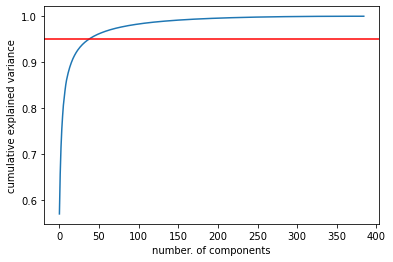

In [33]:
#The below chart explains the cumulative variance based on number of principal components
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number. of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.950, color='r', linestyle='-')

In [34]:
num_components = 75
pca = PCA(num_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_train_pca = pd.DataFrame(X_train_pca)

In [35]:
X_test_pca = pca.fit_transform(X_test_scaled)
X_test_pca = pd.DataFrame(X_test_pca)

In [36]:
df_h_pca = pca.fit_transform(df_h_scaled)
df_h_pca = pd.DataFrame(df_h_pca)

In [37]:
X_train_pca.to_csv('X_train_pca.csv', index = False)

In [38]:
y_train.to_csv('y_train.csv', index = False)

In [39]:
df_h_pca.to_csv('df_h_pca.csv', index = False)

In [40]:
X_test_pca.to_csv('X_test_pca.csv', index = False)
y_test.to_csv('y_test.csv', index = False)